# K Nearest Neighbors with Python

KNN is classification algorithm that operates on a very simple principle.<br>
it is best shown through examples

<img src="one.PNG">

## Training Algorithm

- store all the data

## Prediction algorithm

- calculate the distance from x to all points in your data
- sort the points in your data in increasing distance from x
- predict the majority label of the 'k' closest points

##### Choosing a K will affect what class a new point is assigned to

<img src="two.PNG">

in this classification task we are going to classify whether an individual is diabetic or not by using the folowing features
- pregnant
- glucose
- bp
- skin
- insulin
- bmi
- pedigree
- age
<br>label will be our target variable

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

In [2]:
pima = pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Sample EDA

<Axes: xlabel='age', ylabel='Density'>

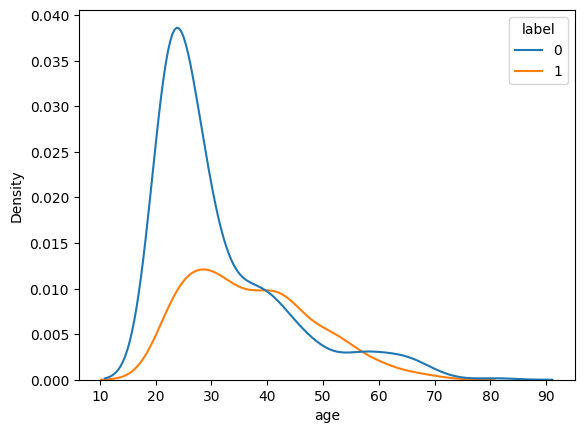

In [5]:
sns.kdeplot(data = pima, x='age', hue='label')

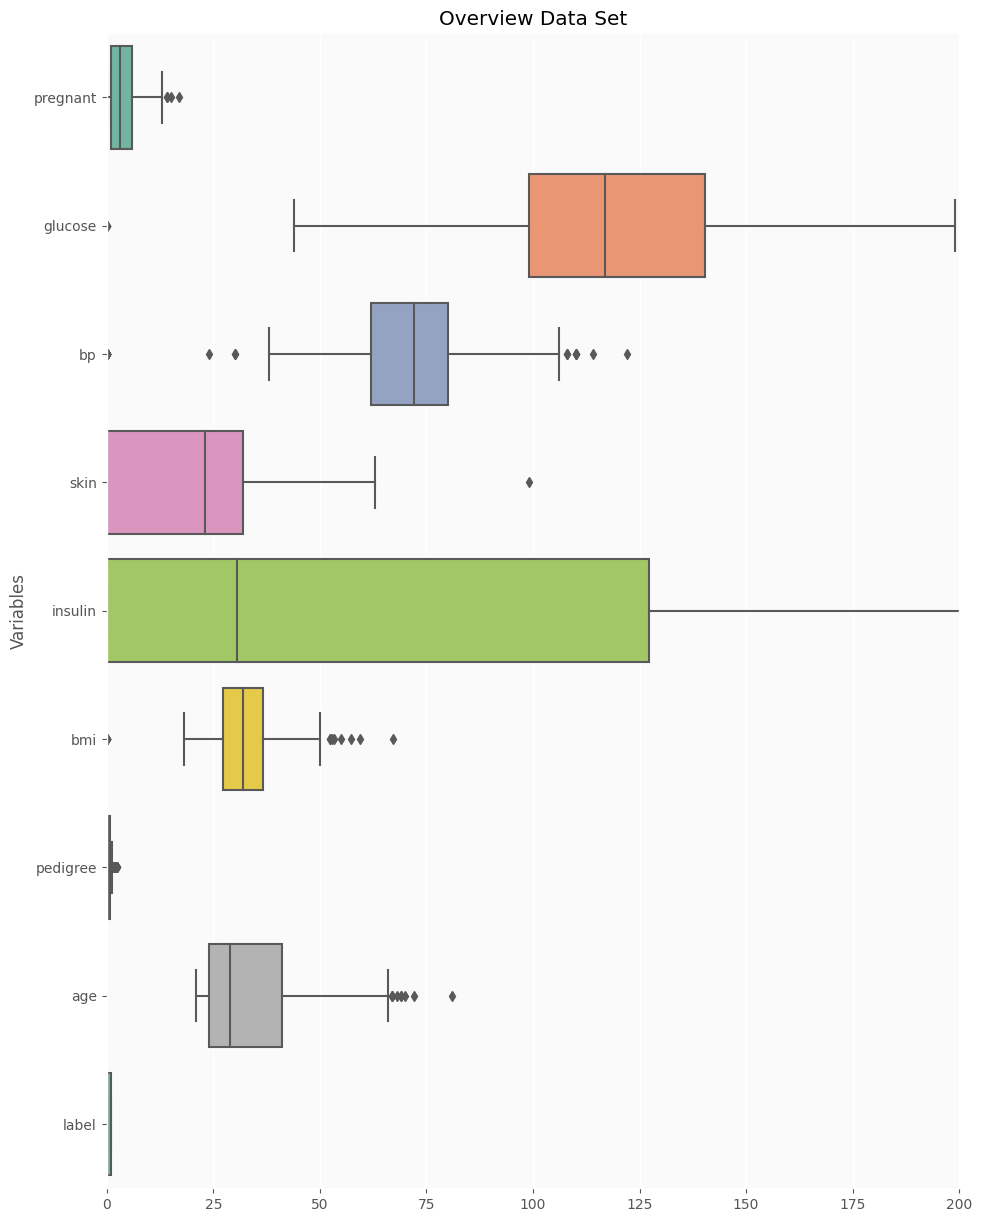

In [6]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = pima, 
  orient = 'h', 
  palette = 'Set2')

<AxesSubplot:xlabel='insulin', ylabel='Density'>

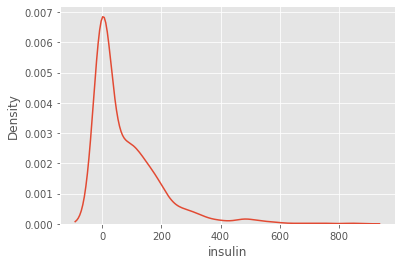

In [7]:
sns.kdeplot(data = pima, x='insulin')
# sns.boxplot(data = pima.insulin, orient = 'h', palette = 'Set2')

it is obvious that column insulin has alot of outliers, we will deal with them during data transformation

<AxesSubplot:xlabel='label', ylabel='count'>

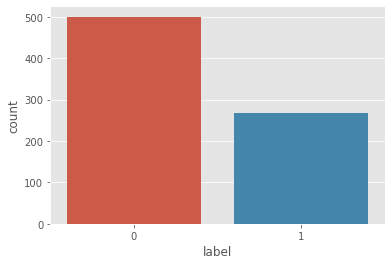

In [8]:
sns.countplot(data=pima, x='label')

Our classes are not balanced

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [7]:
from sklearn.preprocessing import QuantileTransformer

In [8]:
transfomer = QuantileTransformer(n_quantiles=100)

In [9]:
transformed_features = transfomer.fit_transform(pima.drop('label',axis=1))

In [10]:
pima_feat = pd.DataFrame(transformed_features,columns=pima.columns[:-1])
pima_feat.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,0.747475,0.808824,0.515152,0.803030,0.000000,0.594595,0.751386,0.888889
1,0.232323,0.101010,0.338384,0.641414,0.000000,0.225589,0.476243,0.555556
2,0.863636,0.956229,0.277778,0.000000,0.000000,0.091751,0.784680,0.580808
3,0.232323,0.131313,0.338384,0.505051,0.665224,0.296296,0.104145,0.000000
4,0.000000,0.717172,0.051127,0.803030,0.832884,0.926186,0.998153,0.606061


<Axes: xlabel='insulin', ylabel='Density'>

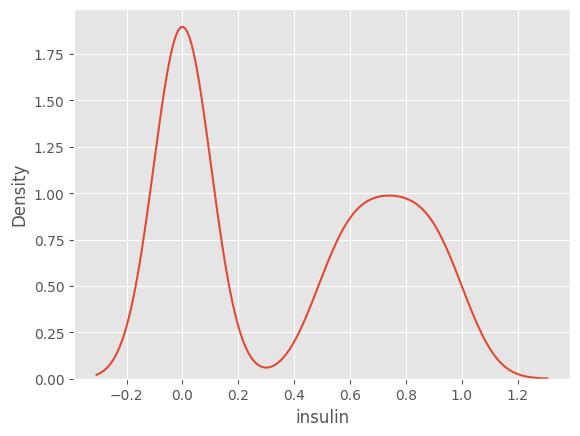

In [12]:
sns.kdeplot(data = pima_feat, x='insulin')

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(transformed_features,pima['label'],
                                                    test_size=0.20,random_state=101)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone is diabetic or not. We'll start with k=1.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [29]:
accuracy_score(y_test, pred)

0.6818181818181818

In [30]:
confusion_matrix(y_test,pred)

array([[77, 26],
       [23, 28]])

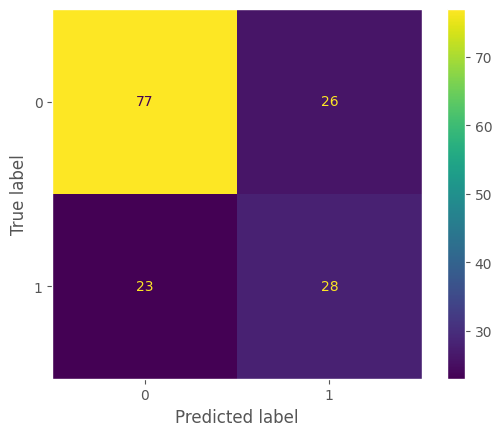

In [31]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.grid(False)

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       103
           1       0.52      0.55      0.53        51

    accuracy                           0.68       154
   macro avg       0.64      0.65      0.65       154
weighted avg       0.69      0.68      0.68       154



#### Accuracy

It tells us how accurate our predictive model is:
   <img src="acc.PNG">
<br>
for our case:

In [33]:
# (121+44)/(121+44+23+43)

#### Precision

When the model predicted Yes, how often was it correct? This is the percentage of positive
cases out of the total predicted cases in the dataset
<img src="Precision.PNG">

for our case:

In [71]:
# 44/(44+23)

#### Recall(Sensitivity)

When it is actually Yes, how often did the model predict Yes? This is also known as
sensitivity. 
<img src="recall.PNG">

from our case:

In [72]:
# 44/(43+44)

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [34]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

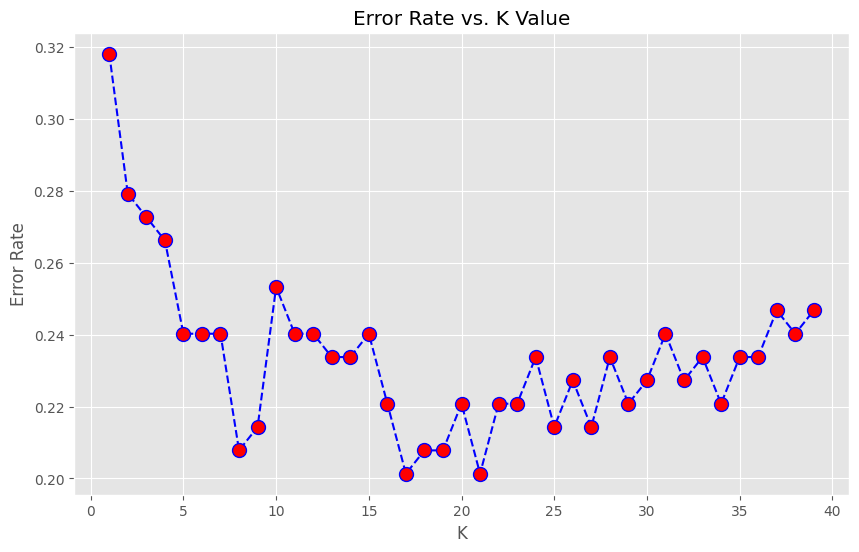

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after around K>20 the error rate just tends to hover around 0.21-0.25

But the values with less erros are around 16 and 21 Let's retrain the model with that and check the classification report!

In [38]:
knn_16 = KNeighborsClassifier(n_neighbors=16)

knn_16.fit(X_train,y_train)
pred_16 = knn_16.predict(X_test)

print('WITH K=16')
print(classification_report(y_test,pred))

WITH K=16
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       103
           1       0.52      0.55      0.53        51

    accuracy                           0.68       154
   macro avg       0.64      0.65      0.65       154
weighted avg       0.69      0.68      0.68       154



In [37]:
accuracy_score(y_test, pred_16)

0.7792207792207793

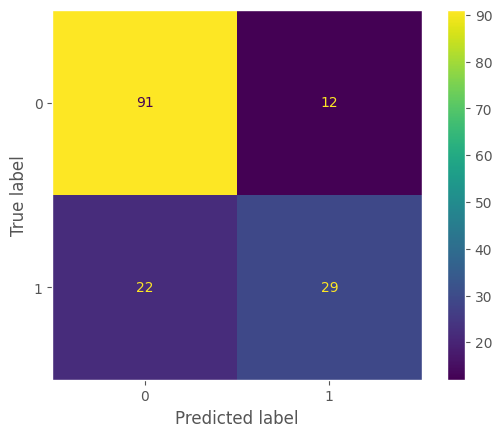

In [39]:
ConfusionMatrixDisplay.from_estimator(knn_16, X_test, y_test)
plt.grid(False)

In [40]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(f'WITH K=21 the accuracy is {accuracy_score(y_test, pred)}')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21 the accuracy is 0.7792207792207793


[[90 13]
 [21 30]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       103
           1       0.70      0.59      0.64        51

    accuracy                           0.78       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



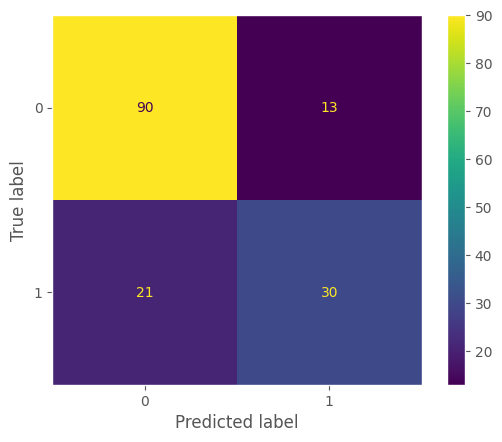

In [42]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.grid(False)

### PIPELINING

In [43]:
pima.head(5)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
X_train, X_test, y_train, y_test = train_test_split(pima.drop('label',axis=1),pima['label'],
                                                    test_size=0.20,random_state=101)

In [65]:
X_train.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
709,2,93,64,32,160,38.0,0.674,23
425,4,184,78,39,277,37.0,0.264,31
135,2,125,60,20,140,33.8,0.088,31
630,7,114,64,0,0,27.4,0.732,34
500,2,117,90,19,71,25.2,0.313,21


In [45]:
from sklearn.pipeline import Pipeline

In [46]:
pipe = Pipeline([
    ('scaling', QuantileTransformer(n_quantiles=100)),
    ('modeling', KNeighborsClassifier(n_neighbors=22))
])

In [49]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaling', QuantileTransformer(n_quantiles=100)),
                ('modeling', KNeighborsClassifier(n_neighbors=22))])

In [50]:
preds = pipe.predict(X_test)

In [51]:
print(f'WITH K=22 the accuracy is {accuracy_score(y_test, preds)}')

WITH K=22 the accuracy is 0.7857142857142857


### CROSS VALIDATION

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
pipe.get_params()

{'memory': None,
 'steps': [('scaling', QuantileTransformer(n_quantiles=100)),
  ('modeling', KNeighborsClassifier(n_neighbors=22))],
 'verbose': False,
 'scaling': QuantileTransformer(n_quantiles=100),
 'modeling': KNeighborsClassifier(n_neighbors=22),
 'scaling__copy': True,
 'scaling__ignore_implicit_zeros': False,
 'scaling__n_quantiles': 100,
 'scaling__output_distribution': 'uniform',
 'scaling__random_state': None,
 'scaling__subsample': 10000,
 'modeling__algorithm': 'auto',
 'modeling__leaf_size': 30,
 'modeling__metric': 'minkowski',
 'modeling__metric_params': None,
 'modeling__n_jobs': None,
 'modeling__n_neighbors': 22,
 'modeling__p': 2,
 'modeling__weights': 'uniform'}

In [54]:
model = GridSearchCV(
    estimator=pipe,
    param_grid={'modeling__n_neighbors':[i for i in range(15,25)]},
    cv=5
)

In [57]:
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling',
                                        QuantileTransformer(n_quantiles=100)),
                                       ('modeling',
                                        KNeighborsClassifier(n_neighbors=22))]),
             param_grid={'modeling__n_neighbors': [15, 16, 17, 18, 19, 20, 21,
                                                   22, 23, 24]})

In [58]:
pd.DataFrame(model.cv_results_)
# model.cv_results_

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004950,0.002082,0.011879,0.002682,15,{'modeling__n_neighbors': 15},0.715447,0.747967,0.739837,0.747967,0.696721,0.729588,0.020302,2
1,0.004214,0.000786,0.008731,0.000468,16,{'modeling__n_neighbors': 16},0.715447,0.739837,0.731707,0.723577,0.688525,0.719819,0.017633,5
2,0.003256,0.000461,0.007825,0.001058,17,{'modeling__n_neighbors': 17},0.723577,0.756098,0.772358,0.747967,0.672131,0.734426,0.034900,1
3,0.002900,0.000189,0.007359,0.000710,18,{'modeling__n_neighbors': 18},0.707317,0.731707,0.731707,0.731707,0.655738,0.711635,0.029502,10
4,0.002790,0.000091,0.006969,0.000226,19,{'modeling__n_neighbors': 19},0.715447,0.731707,0.723577,0.739837,0.680328,0.718179,0.020598,6
5,0.002722,0.000013,0.006926,0.000074,20,{'modeling__n_neighbors': 20},0.715447,0.731707,0.739837,0.747967,0.696721,0.726336,0.018301,3
6,0.002745,0.000020,0.007125,0.000483,21,{'modeling__n_neighbors': 21},0.715447,0.707317,0.715447,0.747967,0.688525,0.714941,0.019221,9
7,0.002747,0.000047,0.006946,0.000048,22,{'modeling__n_neighbors': 22},0.715447,0.723577,0.723577,0.739837,0.680328,0.716553,0.019770,7
8,0.003279,0.000607,0.010332,0.002786,23,{'modeling__n_neighbors': 23},0.707317,0.715447,0.756098,0.739837,0.663934,0.716527,0.031500,8
9,0.003032,0.000167,0.007648,0.000653,24,{'modeling__n_neighbors': 24},0.731707,0.715447,0.747967,0.756098,0.663934,0.723031,0.032682,4


### In Summary

KNN has three basic properties, which are non-parametric, lazy learner, and instance-based
learning. Non-parametric means the algorithm is distribution-free and there is no need for
parameters such as mean and standard deviation. Lazy learner means KNN does not train
the model; that is, the model is trained in the testing phase. This makes for faster training
but slower testing. It is also more time- and memory-consuming. Instance-based learning
means the predicted outcome is based on the similarity with its nearest neighbors. It does
not create any abstract equations or rules for prediction; instead, it stores all the data and
queries each record